# TMBD EDA (Core)

- Load in your csv.gz's of results for each year extracted.
- Concatenate the data into 1 dataframe for the remainder of the analysis.
- Once you have your data from the API, they would like you to perform some light EDA to show:
  - How many movies had at least some valid financial information (values > 0 for budget OR revenue)?
  - Please exclude any movies with 0's for budget AND revenue from the remaining visualizations.
  - How many movies are there in each of the certification categories (G/PG/PG-13/R)?
  - What is the average revenue per certification category?
  - What is the average budget per certification category?

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load in data from 2000 and 2001
year2001_df = pd.read_csv("Data/final_tmdb_data_2001.csv.gz")

# How many movies had at least some valid financial information (values > 0 for budget OR revenue)?

In [3]:
financialdf = year2001_df.loc[(year2001_df['budget'] > 0) | (year2001_df['revenue'] > 0)]
financialdf.shape[0]

322

# How many movies are there in each of the certification categories (G/PG/PG-13/R)?

In [4]:
financialdf['certification'].value_counts()

R        118
PG-13     70
PG        18
NR         8
G          6
Name: certification, dtype: int64

In [5]:
revenue_df = financialdf.groupby('certification')['revenue'].mean()
revenue_df.round(2)

certification
G        1.481958e+08
NR       7.664116e+06
PG       1.418149e+08
PG-13    9.684948e+07
R        3.502943e+07
Name: revenue, dtype: float64

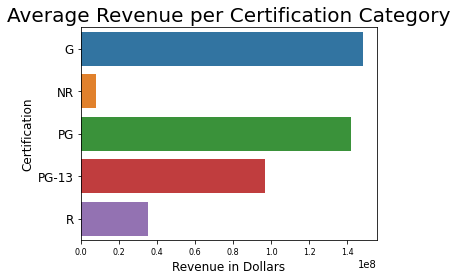

In [6]:
ax = sns.barplot (y=revenue_df.index, x=revenue_df.values.round(1), orient = 'h')
plt.title('Average Revenue per Certification Category', fontsize=20)
plt.xlabel('Revenue in Dollars', fontsize=12)
plt.ylabel('Certification', fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show;

# What is the average budget per certification category?

In [7]:
budget_df = financialdf.groupby('certification')['budget'].mean()
budget_df.round(2)

certification
G        35333333.33
NR        2287500.00
PG       41991666.94
PG-13    40962970.39
R        21204741.10
Name: budget, dtype: float64

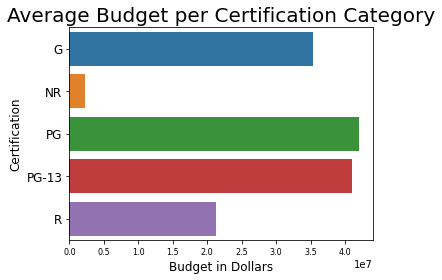

In [8]:
ax = sns.barplot (y=budget_df.index, x=budget_df.values.round(1), orient = 'h')
plt.title('Average Budget per Certification Category', fontsize=20)
plt.xlabel('Budget in Dollars', fontsize=12)
plt.ylabel('Certification', fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show;